# Basic Audio Exploration

1) Play audio
2) View Time Series
3) View Spectrogram

In [2]:
import librosa
import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
plt.rcParams.update({'font.size': 18})
base_path = "/home/ubuntu/"

## 1) Play audio

In [4]:
test_audio = base_path + "data/biden-twitter-fake.wav"

### Using `scipy`

In [7]:
fs, audio = wavfile.read(test_audio)
print(f"Loaded {audio.size} samples at a sampling rate of {fs}Hz")
ipd.Audio(audio, rate=fs)

Loaded 1667072 samples at a sampling rate of 44100Hz


### Using `librosa`

In [8]:
y, sr = librosa.load(test_audio)
print(f"Loaded {y.size} samples at a sampling rate of {sr}Hz")
ipd.Audio(y, rate=sr)

Loaded 833536 samples at a sampling rate of 22050Hz


__Note:__ Note that `librosa` and `scipy` load the audio files at different sampling rates.

## 2) Plot time series

### Using `matplotlib` for `scipy` output

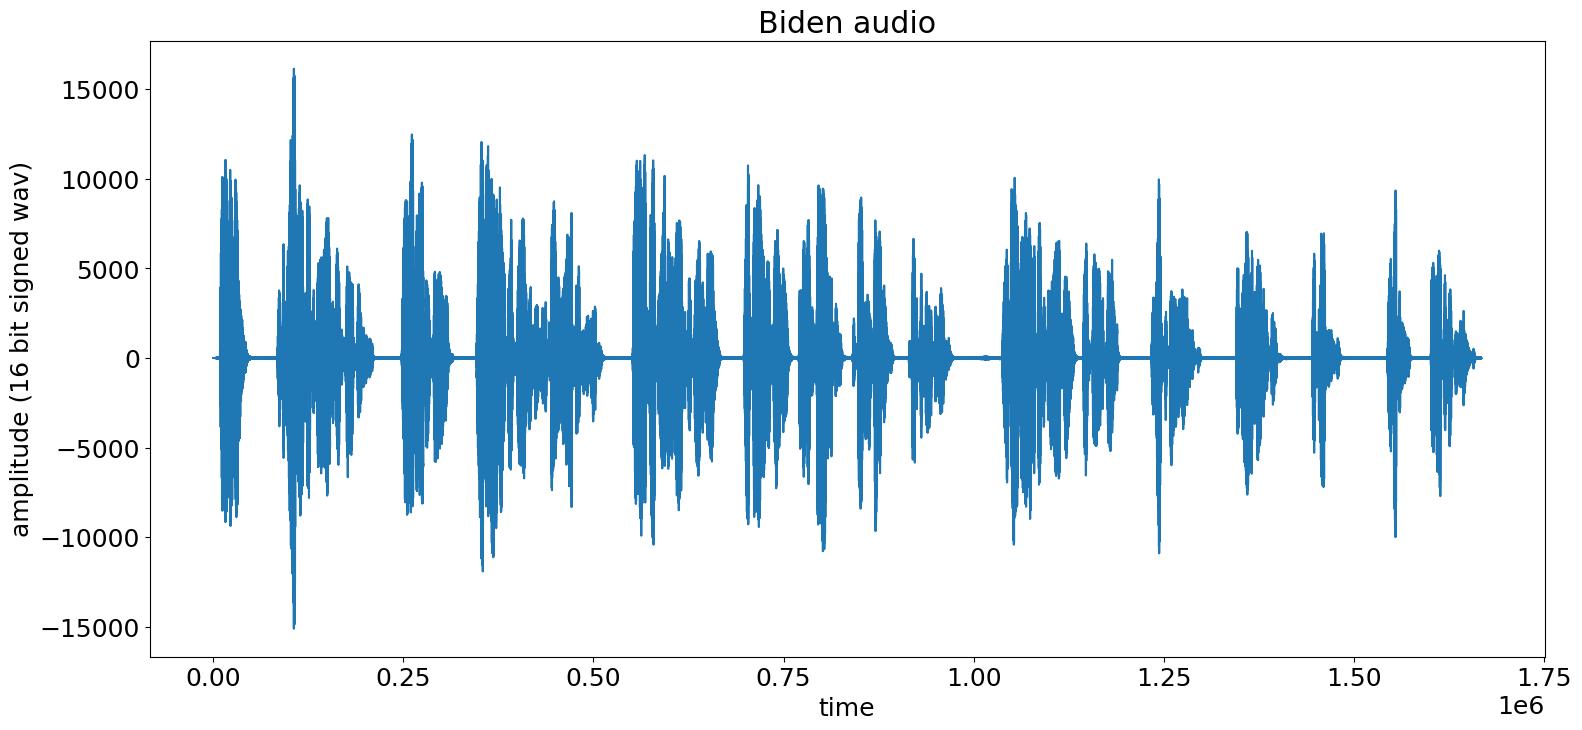

In [9]:
plt.figure(figsize=(18,8))
plt.plot(np.arange(len(audio)) ,audio)
plt.xlabel("time")
plt.ylabel("amplitude (16 bit signed wav)")
plt.title("Biden audio")
plt.show()

### Using `librosa`

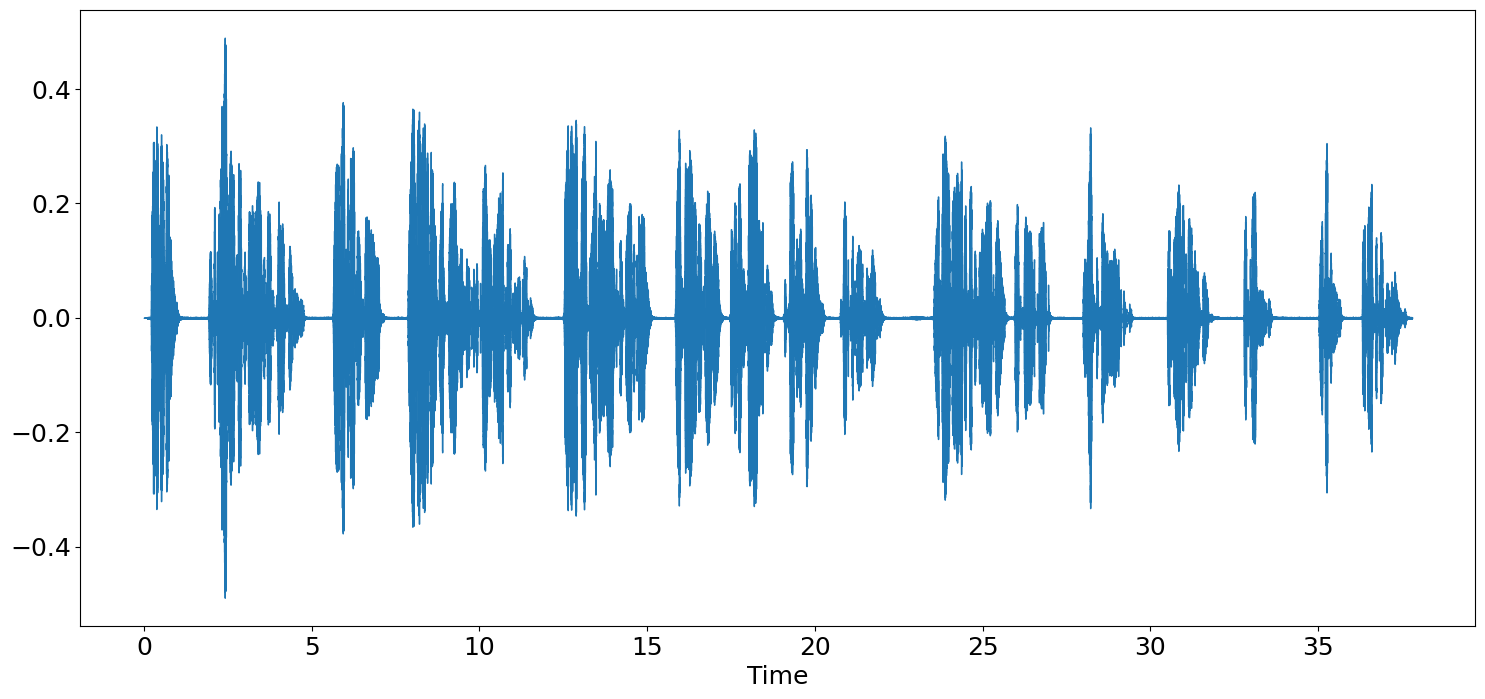

In [11]:
plt.figure(figsize=(18,8))
librosa.display.waveshow(y, sr=sr)

## 2) Plot spectrogram

### Using `matplotlib` for `scipy` output

/home/ubuntu/miniconda3/envs/deepfake-detection-v1/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7720: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


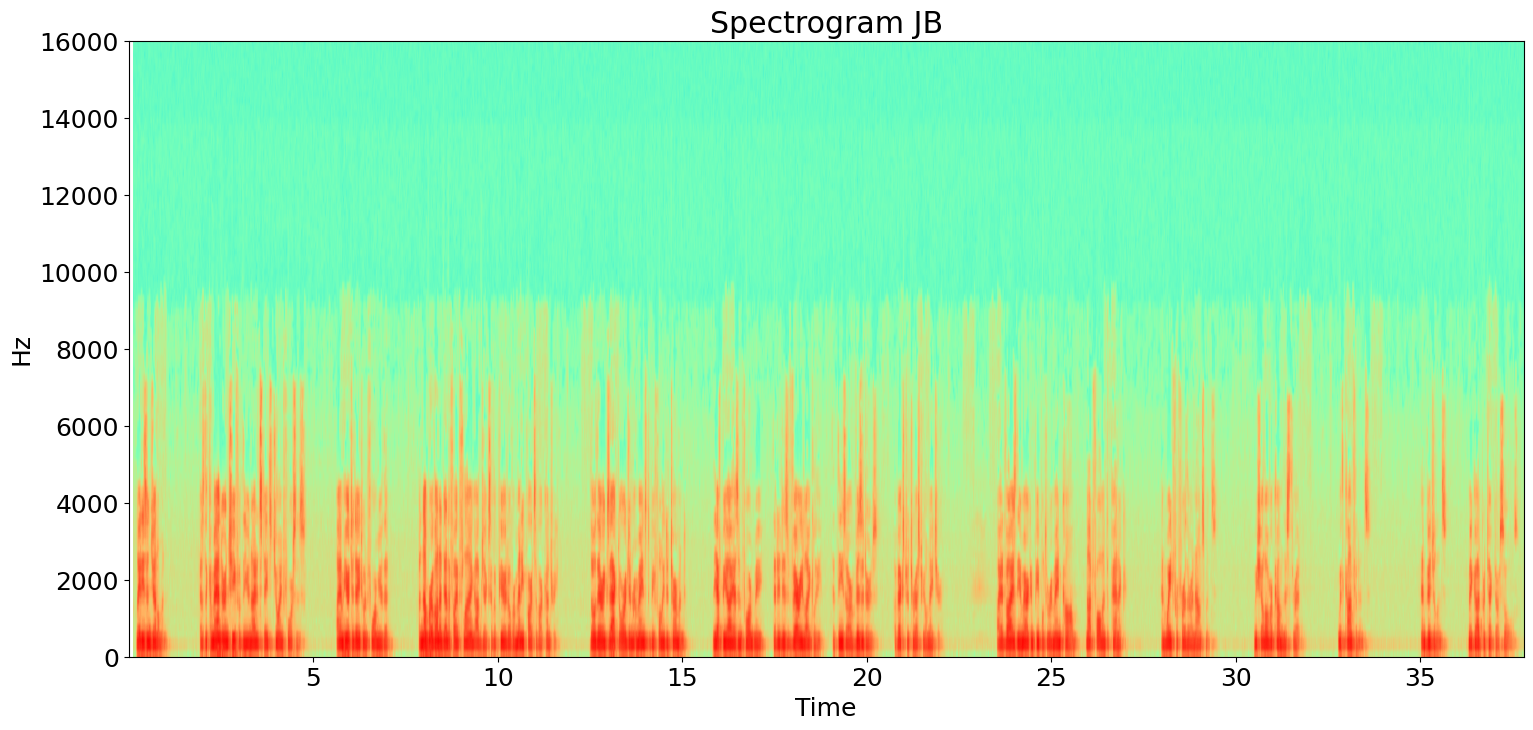

In [12]:
plt.figure(figsize=(18,8))
plt.specgram(audio, Fs=fs, cmap="rainbow")
plt.title('Spectrogram JB')
plt.ylim((0,16000))
plt.xlabel("Time")
plt.ylabel("Hz")
plt.show()

## Using `librosa`

https://librosa.org/doc/main/auto_examples/plot_display.html

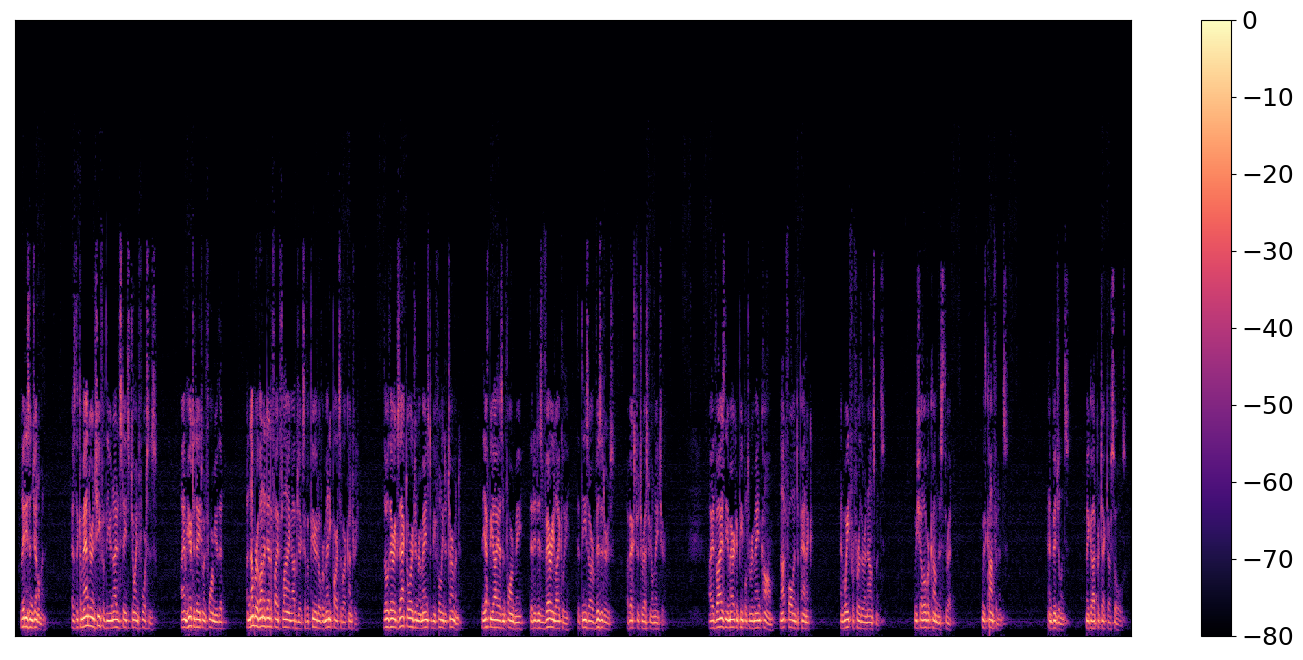

In [15]:
y, sr = librosa.load(test_audio)
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure(figsize=(18,8))
librosa.display.specshow(S_db)
plt.colorbar()